In [1]:
pwd

'/home/bijanadmin/Desktop/DL-modulators'

In [2]:
%matplotlib inline
import numpy as np
import torch
from torch import nn, optim
from torchvision import transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os

## DATA 
### Load all the HIT trials in a given Session (all electrodes)

In [3]:
# PATH DIRECTORY 
Sess = 15
Ch = 1
maxCh = 10
# format image (resolution):
x_size = 100
y_size = 61
################
# CHANNEL 1 ###
###############

# name directory
pathHit = 'Data/Hits/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)
# print(pathHit)
# name files
fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,1)) # name file hit (first one)
fnHitLabels = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_Hits_index.txt".format(Ch)) # name file with labels index

# load hit matrix and label vector
tensor_hit = np.loadtxt(fnHit,dtype='f',delimiter='\t') # load hit matrix
tensor_hit = tensor_hit.reshape(1,x_size,y_size) # reshape the tensor leaving dim = 0 for batches
labelsHit = np.loadtxt(fnHitLabels,dtype='l',delimiter='\t') # load labels vector


#     #plt.imshow(np.flipud(tensor_hit.transpose()))
# for all other indexes
for indx in range(2,len(labelsHit)+1):
    fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,indx)) # name file hit (following one)
    newmat_hit = np.loadtxt(fnHit,dtype='f',delimiter='\t') # load hit matrix
    newmat_hit = newmat_hit.reshape(1,x_size,y_size) # reshape 
    tensor_hit = np.concatenate((tensor_hit,newmat_hit),axis=0) # stack matrix along the 1st dimension 

#####################
# ALL OTHER CHANNELS
#####################

for Ch in range(2,maxCh+1):
    
    print('Other Channels')
    
    print('Channel: ',Ch)
    # name directory
    pathHit = 'Data/Hits/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)
#     print(pathHit)

    # name file
    fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,1)) # name file hit (first one)
    fnHitLabels = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_Hits_index.txt".format(Ch)) # name file hit (first one)

    labels_Hit = np.loadtxt(fnHitLabels,dtype='l',delimiter='\t') # load hit matrix

#     #plt.imshow(np.flipud(tensor_hit.transpose()))
    for indx in range(2,len(labels_Hit)+1):
        fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,indx)) # name file hit (following one)
        newmat_hit = np.loadtxt(fnHit,dtype='f',delimiter='\t') # load hit matrix
        newmat_hit = newmat_hit.reshape(1,x_size,y_size) # reshape 

        tensor_hit = np.concatenate((tensor_hit,newmat_hit),axis = 0) # stack matrix along the 1st dimension 

Other Channels
Channel:  2
Other Channels
Channel:  3
Other Channels
Channel:  4
Other Channels
Channel:  5
Other Channels
Channel:  6
Other Channels
Channel:  7
Other Channels
Channel:  8
Other Channels
Channel:  9
Other Channels
Channel:  10


In [6]:
tensor_hit.shape

(64, 100, 61)

### Load all the MISS trials in a given Session (all electrodes)

In [4]:
# PATH DIRECTORIES 
Sess = 15
Ch = 10

################
# CHANNEL 1 ###
###############

# name directory
pathMiss = 'Data/Misses/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)
# print(pathMiss)


# name files
fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,1)) # name file miss (first one)
fnMissLabels = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_Misses_index.txt".format(Ch)) # name file with labels index

# load miss matrix and label vector
tensor_miss = np.loadtxt(fnMiss,dtype='f',delimiter='\t') # load miss matrix
tensor_miss = tensor_miss.reshape(1,x_size,y_size) # reshape the tensor leaving dim = 0 for batches
labels_Miss = np.loadtxt(fnMissLabels,dtype='l',delimiter='\t') # load labels vector

#     #plt.imshow(np.flipud(tensor_miss.transpose()))
# for all other indexes
for indx in range(2,len(labels_Miss)+1):
    fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,indx)) # name file miss (following one)
    newmat_miss = np.loadtxt(fnMiss,dtype='f',delimiter='\t') # load miss matrix
    newmat_miss = newmat_miss.reshape(1,x_size,y_size) # reshape the tensor leaving dim = 0 for batches
    tensor_miss = np.concatenate((tensor_miss,newmat_miss),axis=0) # stack matrix along the 1st dimension 
        
####################
# ALL OTHER CHANNELS
# ####################

for Ch in range(2,maxCh+1):
    
    print('Other channels...')
    
    print('Channel: ',Ch)
    # name directory
    pathMiss = 'Data/Misses/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)

    # name files
    fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,1)) # name file miss (first one)
    fnMissLabels = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_Misses_index.txt".format(Ch)) # name file with labels index

    labels_Miss = np.loadtxt(fnMissLabels,dtype='l',delimiter='\t') # load labels vector

#     #plt.imshow(np.flipud(tensor_miss.transpose()))
    for indx in range(2,len(labels_Miss)+1):
        fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,indx)) # name file miss (following one)
        newmat_miss = np.loadtxt(fnMiss,dtype='f',delimiter='\t') # load miss matrix
        newmat_miss = newmat_miss.reshape(1,x_size,y_size) # reshape the tensor leaving dim = 0 for batches
        tensor_miss = np.concatenate((tensor_miss,newmat_miss),axis=0) # stack matrix along the 1st dimension 

print(tensor_miss.shape) 

Other channels...
Channel:  2
Other channels...
Channel:  3
Other channels...
Channel:  4
Other channels...
Channel:  5
Other channels...
Channel:  6
Other channels...
Channel:  7
Other channels...
Channel:  8
Other channels...
Channel:  9
Other channels...
Channel:  10
(431, 100, 61)


In [5]:
print(tensor_hit.shape)
print(tensor_miss.shape)

(645, 100, 61)
(431, 100, 61)


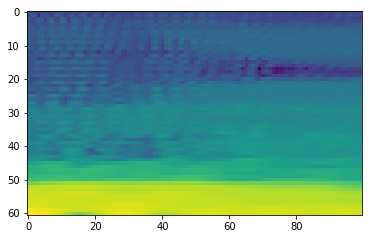

In [6]:
plt.imshow(np.flipud(tensor_hit[0,:,:].transpose()))

### Generate the labels

Generate the labels for hits and misses and stack them into a single array

In [7]:
labels_hit = np.ones(tensor_hit.shape[0],dtype='l')
labels_miss = np.zeros(tensor_miss.shape[0],dtype='l')
labels_tot = np.concatenate((labels_hit,labels_miss),axis=None)
# print(labels_tot)
print(labels_tot.shape)

(1076,)


### Merge all the hits and misses matrices together

In [8]:
tensor_trial = np.concatenate((tensor_hit,tensor_miss),axis=0)
print(tensor_trial.shape)

(1076, 100, 61)


### Normalize inputs

In [9]:
for indx in range(tensor_trial.shape[0]):
    mean = np.mean(tensor_trial[indx,:,:])
    std = np.std(tensor_trial[indx,:,:,])
    tensor_trial[indx,:,:,] = (tensor_trial[indx,:,:,] - mean)/std

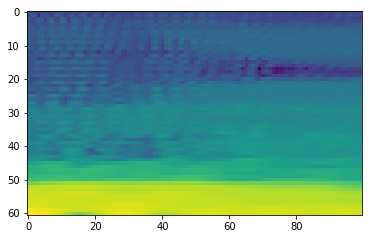

In [10]:
plt.imshow(np.flipud(tensor_trial[0,:,:].transpose()))

## Load data into a trainloader and testloader

In [14]:
TOT_data = []
for i in range(len(labels_tot)):
    TOT_data.append([tensor_trial[i,:,:], labels_tot[i]])

# set length train and test set
train_length = int(0.75*len(TOT_data))
test_length = len(TOT_data) - train_length

# split data set 
train_dataset, test_dataset = torch.utils.data.random_split(TOT_data,(train_length,test_length))

trainloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=20)
testloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=20)

In [12]:
TOT_data
# labels_tot[0]

[[array([[ 2.3660913 ,  2.2550306 ,  2.1463082 , ..., -0.95992535,
          -1.2674273 , -1.2893667 ],
         [ 2.3582978 ,  2.249965  ,  2.1287723 , ..., -1.1530542 ,
          -0.90108263, -1.2266661 ],
         [ 2.3446589 ,  2.2425609 ,  2.1100671 , ..., -1.1691093 ,
          -1.0129229 , -1.4747019 ],
         ...,
         [ 2.0734367 ,  2.0445998 ,  1.9869261 , ..., -1.2481768 ,
          -1.071376  , -1.0979526 ],
         [ 2.060577  ,  2.0344677 ,  1.975625  , ..., -1.2625173 ,
          -1.0455006 , -1.0392268 ],
         [ 2.0414824 ,  2.0184908 ,  1.9608169 , ..., -1.2965369 ,
          -1.1949456 , -1.0741427 ]], dtype=float32), 1],
 [array([[ 1.7058375 ,  1.6950676 ,  1.6773745 , ..., -1.1533722 ,
          -1.1252166 , -1.0851374 ],
         [ 1.7100687 ,  1.6935292 ,  1.6819901 , ..., -1.1651036 ,
          -0.9142424 , -0.96943796],
         [ 1.7166077 ,  1.6900675 ,  1.6885291 , ..., -1.007671  ,
          -0.9675149 , -1.0394037 ],
         ...,
         [ 2.71

### Create iterable as a test 

The batch_size decides how many images in the batch during the training or test.
The numb of iteration in each train (test) loader are: tot length of train (test) data / batch_size. So if the tot number of data is 2000 and the batch size is 50, the iteration on the dataloader is done 40 times, each time 50 images are loaded 

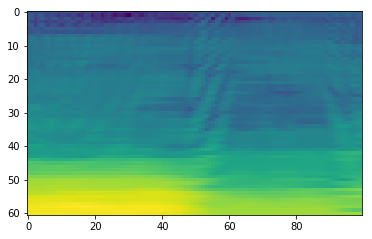

Batch:  0
Label:  1



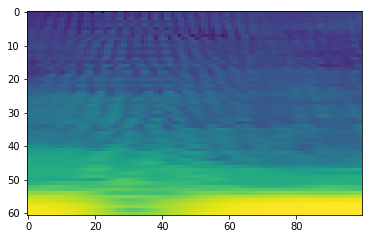

Batch:  1
Label:  1



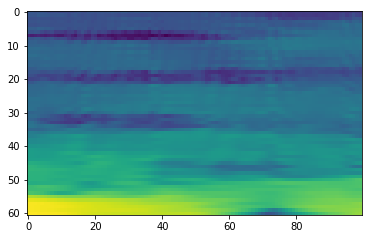

Batch:  2
Label:  1



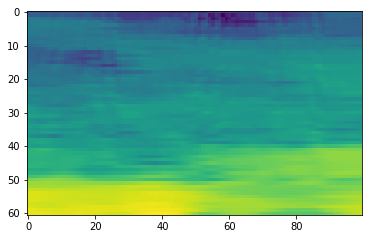

Batch:  3
Label:  0



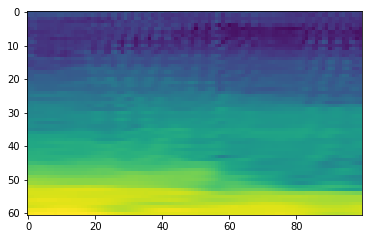

Batch:  4
Label:  1

torch.Size([20])
torch.Size([20, 100, 61])
tensor(1)


In [15]:
batch_size = 5
images, labels = next(iter(testloader))
for b in range(batch_size):
    plt.imshow(np.flipud(images[b].numpy().transpose()))
    plt.show()
    print('Batch: ',b)
    print('Label: ',labels[b].item())
    print()
print(labels.shape)
print(images.shape)
print(labels[0])

## Test asymmetric padding

In [16]:
batch_size = 5
images.shape
pad_transform = nn.ZeroPad2d((0, 1, 0, 0))
# imagesExp = images.view(5,1,100,61) # images is expanded to host the channel dimension for the CNN
imagesExp = images.view(images.shape[0],1,images.shape[1],images.shape[2]) # images is expanded to host the channel dimension for the CNN
temp = pad_transform(imagesExp)
# print(images.shape)
# print(temp.shape)

# images, labels = next(iter(testloader))
# for b in range(batch_size):
#     imagesExp = images.view(5,1,100,61)
#     temp = pad_transform(imagesExp)
#     plt.imshow(np.flipud(temp[b,0].numpy())) # note the image is not transpose to understand where the padding is applied 
#     plt.show()
#     print('Batch: ',b)
#     print('Label: ',labels[b].item())
#     print()
    
# print(labels.shape)
print(images.shape)
print(imagesExp.shape)
# print(labels[0])
print(temp.shape)

torch.Size([20, 100, 61])
torch.Size([20, 1, 100, 61])
torch.Size([20, 1, 100, 62])


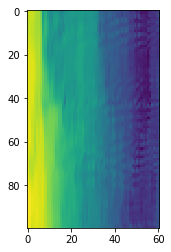

In [18]:
temp = images.view(images.shape[0],1,100,61)
temp.shape
plt.imshow(np.flipud(temp[b,0].numpy())) # note the image is not transpose to understand where the padding is applied 


In [14]:
images[0].std()
print(images.shape)
labels

torch.Size([5, 100, 61])


tensor([1, 1, 1, 0, 1])

In [19]:
images.view(images.shape[0],-1).shape
images.shape[1]

100

# MODELS
### My multilayer perceptron (with dropout)

In [16]:
class FFN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # linear layers
        self.fc1 = nn.Linear(6100,3000)
        self.fc2 = nn.Linear(3000, 1500)
        self.fc3 = nn.Linear(1500,700)
        self.fc4 = nn.Linear(700,381)
        self.fc5 = nn.Linear(381,2)
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.1)    
    
    def forward(self,x):
        
        # flatten the input tensor 
        x = x.view(x.shape[0],-1)
        
        # activation functions
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
#         x = self.fc4(x)
#         x = F.relu(self.fc4(x))
        x = F.log_softmax(self.fc5(x), dim=1)
        
        return x

### Udacity multilayer perceptron 

In [42]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(6100, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

### My CNN (with dropout)

In [186]:
import torch.nn as nn
import torch.nn.functional as F


class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
         
        #######################    
        # convolutional layers
        # ^^^^^^^^^^^^^^^^^^^^

    
        # convolutional layer (sees 100x62x1 image tensor)
        self.conv1 = nn.Conv2d(1,16,3,padding=1)
        # convolutional layer (sees 50x32x16 tensor)
        self.conv2 = nn.Conv2d(16,32,3,padding=1,)
        # convolutional layer (sees 26x16x32 tensor)
        self.conv3 = nn.Conv2d(32,64,3,padding=1,)
        
        # Max pooling
        self.pool = nn.MaxPool2d(2,2)
        
        # fully connected / Linear layers
        self.fc1 = nn.Linear(64 * 13 * 8, 512)
        self.fc2 = nn.Linear(512,256)            
        self.fc3 = nn.Linear(256,2)
        
        # asymmetric padding
        self.pad_R  = nn.ZeroPad2d((0, 1, 0, 0)) # padding right one step
        self.pad_B = nn.ZeroPad2d((0, 0, 1, 0)) # padding bottom one step 
        
        # dropout layer 
        self.dropout = nn.Dropout(0.25)
        
            
    def forward(self,x):
        
        x = x.view(images.shape[0],1,images.shape[1],images.shape[2]) # images is expanded to host the channel dimension for the CNN

        # Convolution 1:
        x = self.pad_R(x) # padding right one step
#         print('x shape conv 1: ',x.shape)
        x = self.conv1(x) # convolutional layer
        x = F.relu(x)     # activation function ReLU
        x = self.pool(x)  # max pooling
        
        # Convolution 2:
        x = self.pad_R(x) # padding right one step
#         print('x shape conv 2: ',x.shape)
        x = self.pool(F.relu(self.conv2(x))) # Convolution 2: in short convolution + relu + pooling  
        
        # Convolution 3:
        x = self.pad_B(x) # padding bottom one step
#         print('x shape conv 3: ',x.shape)
        x = self.pool(F.relu(self.conv3(x))) # Convolution 3: in short convolution + relu + pooling 
        
#         print('x shape before MLP: ',x.shape)

        x = x.view(-1,64 * 13 * 8) # flatten image input
        x = self.dropout(x) # dropout
        
        x = F.relu(self.fc1(x)) # Fully connected 1: linear + relu
        x = self.dropout(x) # dropout
        
        x = F.relu(self.fc2(x)) # Fully connected 2: linear + relu
        x = self.dropout(x) # dropout
        
        x = self.fc3(x) # Fully connected 3: linear 
        
        return x 
    
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6656, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (pad_R): ZeroPad2d(padding=(0, 1, 0, 0), value=0.0)
  (pad_B): ZeroPad2d(padding=(0, 0, 1, 0), value=0.0)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [142]:
model = FFN()
# model = Classifier()
model
# model.fc1.weight.data.normal_(std=0.01)
# model.fc2.weight.data.normal_(std=0.01)
# model.fc3.weight.data.normal_(std=0.01)

NameError: name 'FFN' is not defined

### Set loss function and optimizer

In [188]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

#### Move model on GPU if available 

In [189]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.')
else:
    print('CUDA is available!')

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()
    print('Moving model on GPU...')
next(model.parameters()).is_cuda
train_on_gpu

CUDA is available!
Moving model on GPU...


True

In [145]:
labels

tensor([0, 0, 0, 0, 0], device='cuda:0')

## Train the Network

#### You can skip this and go to the next cell, where you train and validate at the same time 

In [128]:
#######################
#     TRAINING  
######################

model.train() # set the network in training mode

epochs = 1
train_losses, test_losses = [], []

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
    
        if train_on_gpu: # move data on GPU
            images, labels = images.cuda(), labels.cuda()
            
        # flatten images into a vector
#         labels = labels.long() # change label type from int to long 
        
        # Clear the gradients
        optimizer.zero_grad()
        
        log_ps = model(images) # forward pass
        loss = criterion(log_ps,labels) # compute the loss
        loss.backward() # backpropagate to compute the gradients
        optimizer.step() # update the weights
        print('Log ps : ',log_ps)
        print()
        print('Loss: ',loss)
        
        running_loss += loss.item()
        
        print('loss item: ',loss.item(),'running_loss: ',running_loss)
    
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

x shape:  torch.Size([5, 1, 100, 62])


RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [181]:
print('Train dataset length: ',len(train_dataset))
print('Test dataset length: ',len(test_dataset))
print('Trainloader length: ', len(trainloader))
print('Testloader length: ', len(testloader))

Train dataset length:  4167
Test dataset length:  1390
Trainloader length:  70
Testloader length:  24


## Reset the weights to random numbers

In [190]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight.data)

torch.manual_seed(42)
model.apply(weights_init)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6656, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (pad_R): ZeroPad2d(padding=(0, 1, 0, 0), value=0.0)
  (pad_B): ZeroPad2d(padding=(0, 0, 1, 0), value=0.0)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [183]:
next(model.parameters()).is_cuda

True

## Train and validate the Network 

Training and Testing is done on the fly:
<br>
For each epoch the model is trained (the loss is computed by using the training set) and it is tested (the loss and accuracy are computed by using the test set), in order to compare training loss with testing loss and decide when to stop the training and avoid overfitting. 

In [191]:
#######################
#     TRAINING  
######################

model.train() # set the network in training mode

epochs = 500
train_losses, test_losses = [], []

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        if train_on_gpu: # move data on GPU
            images, labels = images.cuda(), labels.cuda()
            
        # flatten images into a vector
#         labels = labels.long() # change label type from int to long 
        
        # Clear the gradients
        optimizer.zero_grad()
        
        log_ps = model(images) # forward pass
        loss = criterion(log_ps,labels) # compute the loss
        loss.backward() # backpropagate to compute the gradients
        optimizer.step() # update the weights
        
        running_loss =+ loss.item()
    
    else:
        
        #######################
        #     VALIDATION 
        ######################
 
        test_loss = 0
        accuracy = 0
        with torch.no_grad(): # set the tracing of gradients to zero
            model.eval() # set the dropout to OFF, i.e. model is in evaluation mode
            

            for images, labels in testloader:
                
#                 for b in range(batch_size):
#                     plt.imshow(np.flipud(images[b].numpy().transpose()))
#                     plt.show()
            
                if train_on_gpu: # move data on GPU
                    images, labels = images.cuda(), labels.cuda()
                
                 # flatten images into a vector
#                 labels = labels.long() # change label type from int to long 
                
                print('\n\n************ New batch....\n')
                log_ps = model(images)
                test_loss += criterion(log_ps,labels)
            
                print('Log ps : \n',log_ps)
                print()
                print('Test loss: ',test_loss)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)         
                print('ps: \n',ps)
                print()
#                 print('top_p: \n',top_p)
#                 print('top_class :\n',torch.transpose(top_class,1,0))
#                 print()
#                 print('labels: ',labels)
                
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)) 
                
#                 print('Equals: \n',equals)
#                 print('accuracy: ',accuracy)
                
                
        model.train() # set the model back to train mode, i.e. dropout is ON
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
            
            
        ############################
        # PRINT ACCURACTY AND LOSSES
        ############################
        if epoch % 10 == 0:
            print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))



************ New batch....

Log ps : 
 tensor([[2.2924e+10, 2.6442e+10],
        [2.3189e+10, 2.6747e+10],
        [2.3134e+10, 2.6684e+10],
        [2.3600e+10, 2.7222e+10],
        [2.4230e+10, 2.7949e+10],
        [2.3463e+10, 2.7063e+10],
        [2.4088e+10, 2.7785e+10],
        [2.4629e+10, 2.8409e+10],
        [2.3995e+10, 2.7677e+10],
        [2.3077e+10, 2.6618e+10],
        [2.4709e+10, 2.8500e+10],
        [2.4972e+10, 2.8803e+10],
        [2.3750e+10, 2.7394e+10],
        [2.4135e+10, 2.7838e+10],
        [2.3488e+10, 2.7092e+10],
        [2.3766e+10, 2.7413e+10],
        [2.3787e+10, 2.7437e+10],
        [2.3634e+10, 2.7261e+10],
        [2.4182e+10, 2.7893e+10],
        [2.2731e+10, 2.6219e+10],
        [2.2933e+10, 2.6452e+10],
        [2.3709e+10, 2.7347e+10],
        [2.2860e+10, 2.6368e+10],
        [2.3197e+10, 2.6757e+10],
        [2.3584e+10, 2.7203e+10],
        [2.2446e+10, 2.5890e+10],
        [2.3532e+10, 2.7143e+10],
        [2.1276e+10, 2.4541e+10],
       

 tensor([[2.2482e+10, 2.5932e+10],
        [2.2012e+10, 2.5390e+10],
        [2.4774e+10, 2.8575e+10],
        [2.2953e+10, 2.6475e+10],
        [2.2089e+10, 2.5479e+10],
        [2.3378e+10, 2.6966e+10],
        [2.3146e+10, 2.6698e+10],
        [2.4040e+10, 2.7729e+10],
        [2.3705e+10, 2.7342e+10],
        [2.3346e+10, 2.6929e+10],
        [2.4656e+10, 2.8440e+10],
        [2.5067e+10, 2.8914e+10],
        [2.0921e+10, 2.4132e+10],
        [2.4591e+10, 2.8365e+10],
        [2.5039e+10, 2.8881e+10],
        [2.4491e+10, 2.8249e+10],
        [2.4913e+10, 2.8736e+10],
        [2.2687e+10, 2.6168e+10],
        [2.2552e+10, 2.6012e+10],
        [2.2836e+10, 2.6340e+10],
        [2.2563e+10, 2.6025e+10],
        [2.4152e+10, 2.7858e+10],
        [2.2896e+10, 2.6410e+10],
        [2.2973e+10, 2.6498e+10],
        [2.5218e+10, 2.9087e+10],
        [2.3133e+10, 2.6682e+10],
        [2.2573e+10, 2.6036e+10],
        [2.2805e+10, 2.6304e+10],
        [2.5968e+10, 2.9952e+10],
        [2.34



************ New batch....

Log ps : 
 tensor([[8.0103e+12, 8.5605e+12],
        [8.3645e+12, 8.9391e+12],
        [9.2116e+12, 9.8443e+12],
        [8.1546e+12, 8.7148e+12],
        [8.8616e+12, 9.4703e+12],
        [9.1037e+12, 9.7290e+12],
        [7.9808e+12, 8.5290e+12],
        [8.5057e+12, 9.0899e+12],
        [8.5110e+12, 9.0956e+12],
        [9.0811e+12, 9.7049e+12],
        [8.8194e+12, 9.4251e+12],
        [8.4017e+12, 8.9788e+12],
        [8.6615e+12, 9.2564e+12],
        [8.6957e+12, 9.2930e+12],
        [8.4853e+12, 9.0681e+12],
        [8.4802e+12, 9.0627e+12],
        [9.3307e+12, 9.9716e+12],
        [8.3709e+12, 8.9459e+12],
        [8.8524e+12, 9.4605e+12],
        [8.5589e+12, 9.1468e+12],
        [8.4784e+12, 9.0608e+12],
        [8.6656e+12, 9.2608e+12],
        [7.7707e+12, 8.3045e+12],
        [8.5115e+12, 9.0961e+12],
        [8.2260e+12, 8.7910e+12],
        [8.9709e+12, 9.5871e+12],
        [8.6159e+12, 9.2077e+12],
        [8.2011e+12, 8.7645e+12],
       

 tensor([[8.3040e+12, 8.8744e+12],
        [8.8898e+12, 9.5005e+12],
        [8.4477e+12, 9.0279e+12],
        [8.1793e+12, 8.7411e+12],
        [8.3065e+12, 8.8771e+12],
        [8.7371e+12, 9.3372e+12],
        [8.8932e+12, 9.5040e+12],
        [8.1129e+12, 8.6701e+12],
        [8.8160e+12, 9.4216e+12],
        [8.2892e+12, 8.8586e+12],
        [8.2963e+12, 8.8662e+12],
        [8.1744e+12, 8.7359e+12],
        [8.7305e+12, 9.3301e+12],
        [8.3054e+12, 8.8759e+12],
        [8.4744e+12, 9.0565e+12],
        [8.5687e+12, 9.1573e+12],
        [8.3536e+12, 8.9274e+12],
        [8.1328e+12, 8.6914e+12],
        [8.2665e+12, 8.8343e+12],
        [8.2556e+12, 8.8227e+12],
        [8.1976e+12, 8.7607e+12],
        [8.8829e+12, 9.4931e+12],
        [8.3549e+12, 8.9288e+12],
        [8.1201e+12, 8.6779e+12],
        [9.1240e+12, 9.7507e+12],
        [8.9553e+12, 9.5704e+12],
        [8.7726e+12, 9.3751e+12],
        [8.4031e+12, 8.9802e+12],
        [8.2957e+12, 8.8655e+12],
        [8.50

ps: 
 tensor([[inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, inf],
        [inf, 

 tensor([[2.3645e+14, 2.4665e+14],
        [2.2900e+14, 2.3889e+14],
        [2.2942e+14, 2.3932e+14],
        [2.2194e+14, 2.3151e+14],
        [2.4823e+14, 2.5894e+14],
        [2.5727e+14, 2.6837e+14],
        [2.1771e+14, 2.2711e+14],
        [2.2801e+14, 2.3785e+14],
        [2.3298e+14, 2.4304e+14],
        [2.3985e+14, 2.5020e+14],
        [2.3705e+14, 2.4728e+14],
        [2.4408e+14, 2.5462e+14],
        [2.2290e+14, 2.3252e+14],
        [2.5206e+14, 2.6294e+14],
        [2.2085e+14, 2.3038e+14],
        [2.2449e+14, 2.3418e+14],
        [2.4339e+14, 2.5389e+14],
        [2.5394e+14, 2.6490e+14],
        [2.3442e+14, 2.4454e+14],
        [2.4323e+14, 2.5373e+14],
        [2.2311e+14, 2.3274e+14],
        [2.1268e+14, 2.2185e+14],
        [2.3843e+14, 2.4872e+14],
        [2.3685e+14, 2.4707e+14],
        [2.3839e+14, 2.4868e+14],
        [2.3209e+14, 2.4210e+14],
        [2.2731e+14, 2.3712e+14],
        [2.2928e+14, 2.3918e+14],
        [2.3689e+14, 2.4711e+14],
        [2.39



************ New batch....

Log ps : 
 tensor([[2.0652e+15, 2.1342e+15],
        [2.1363e+15, 2.2076e+15],
        [2.2873e+15, 2.3636e+15],
        [2.1627e+15, 2.2349e+15],
        [2.2401e+15, 2.3149e+15],
        [2.2094e+15, 2.2832e+15],
        [2.1845e+15, 2.2574e+15],
        [2.2933e+15, 2.3698e+15],
        [2.1129e+15, 2.1834e+15],
        [2.1939e+15, 2.2671e+15],
        [2.3024e+15, 2.3792e+15],
        [2.2042e+15, 2.2777e+15],
        [2.2966e+15, 2.3733e+15],
        [2.1466e+15, 2.2182e+15],
        [2.0847e+15, 2.1543e+15],
        [2.0280e+15, 2.0957e+15],
        [2.2459e+15, 2.3209e+15],
        [2.1995e+15, 2.2729e+15],
        [2.2108e+15, 2.2846e+15],
        [2.0505e+15, 2.1189e+15],
        [2.2419e+15, 2.3167e+15],
        [2.1671e+15, 2.2395e+15],
        [2.2086e+15, 2.2823e+15],
        [2.3234e+15, 2.4009e+15],
        [2.2382e+15, 2.3129e+15],
        [2.2509e+15, 2.3261e+15],
        [2.2322e+15, 2.3067e+15],
        [2.1591e+15, 2.2312e+15],
       

 tensor([[2.2457e+15, 2.3207e+15],
        [2.1470e+15, 2.2187e+15],
        [2.1990e+15, 2.2724e+15],
        [2.2063e+15, 2.2799e+15],
        [2.1541e+15, 2.2260e+15],
        [2.3069e+15, 2.3839e+15],
        [2.2199e+15, 2.2940e+15],
        [2.3037e+15, 2.3806e+15],
        [2.1640e+15, 2.2362e+15],
        [2.0017e+15, 2.0685e+15],
        [2.2019e+15, 2.2754e+15],
        [2.0735e+15, 2.1427e+15],
        [2.1140e+15, 2.1846e+15],
        [2.0942e+15, 2.1640e+15],
        [2.1937e+15, 2.2669e+15],
        [2.2706e+15, 2.3464e+15],
        [2.1885e+15, 2.2616e+15],
        [2.2798e+15, 2.3559e+15],
        [2.1150e+15, 2.1856e+15],
        [2.2746e+15, 2.3505e+15],
        [2.2081e+15, 2.2818e+15],
        [2.2499e+15, 2.3250e+15],
        [2.0516e+15, 2.1201e+15],
        [2.2420e+15, 2.3168e+15],
        [2.2440e+15, 2.3188e+15],
        [2.1845e+15, 2.2574e+15],
        [2.1910e+15, 2.2641e+15],
        [2.2030e+15, 2.2765e+15],
        [2.0581e+15, 2.1268e+15],
        [2.05



************ New batch....

Log ps : 
 tensor([[1.1301e+16, 1.1599e+16],
        [1.1055e+16, 1.1346e+16],
        [1.1512e+16, 1.1815e+16],
        [1.2174e+16, 1.2495e+16],
        [1.1930e+16, 1.2244e+16],
        [1.1563e+16, 1.1867e+16],
        [1.1277e+16, 1.1573e+16],
        [1.2080e+16, 1.2398e+16],
        [1.1741e+16, 1.2050e+16],
        [1.1581e+16, 1.1886e+16],
        [1.1353e+16, 1.1651e+16],
        [1.1779e+16, 1.2089e+16],
        [1.0925e+16, 1.1212e+16],
        [1.1425e+16, 1.1726e+16],
        [1.1543e+16, 1.1847e+16],
        [1.2360e+16, 1.2685e+16],
        [1.1810e+16, 1.2121e+16],
        [1.0654e+16, 1.0934e+16],
        [1.1958e+16, 1.2273e+16],
        [1.1075e+16, 1.1367e+16],
        [1.1819e+16, 1.2130e+16],
        [1.1857e+16, 1.2169e+16],
        [1.1719e+16, 1.2027e+16],
        [1.1176e+16, 1.1470e+16],
        [1.1512e+16, 1.1815e+16],
        [1.1959e+16, 1.2274e+16],
        [1.0968e+16, 1.1257e+16],
        [1.2163e+16, 1.2483e+16],
       

 tensor([[1.2099e+16, 1.2418e+16],
        [1.1921e+16, 1.2235e+16],
        [1.1086e+16, 1.1378e+16],
        [1.1570e+16, 1.1875e+16],
        [1.1752e+16, 1.2061e+16],
        [1.0697e+16, 1.0979e+16],
        [1.1517e+16, 1.1820e+16],
        [1.1711e+16, 1.2020e+16],
        [1.0658e+16, 1.0939e+16],
        [1.1728e+16, 1.2036e+16],
        [1.1655e+16, 1.1962e+16],
        [1.2338e+16, 1.2663e+16],
        [1.1674e+16, 1.1982e+16],
        [1.2292e+16, 1.2615e+16],
        [1.1414e+16, 1.1715e+16],
        [1.1830e+16, 1.2141e+16],
        [1.1058e+16, 1.1349e+16],
        [1.2085e+16, 1.2403e+16],
        [1.0678e+16, 1.0959e+16],
        [1.2399e+16, 1.2726e+16],
        [1.1876e+16, 1.2189e+16],
        [1.2194e+16, 1.2515e+16],
        [1.1641e+16, 1.1948e+16],
        [1.2363e+16, 1.2689e+16],
        [1.1257e+16, 1.1553e+16],
        [1.1421e+16, 1.1722e+16],
        [1.0530e+16, 1.0807e+16],
        [1.1097e+16, 1.1389e+16],
        [1.1715e+16, 1.2023e+16],
        [1.13



************ New batch....

Log ps : 
 tensor([[4.1443e+16, 4.2377e+16],
        [3.9631e+16, 4.0525e+16],
        [4.3132e+16, 4.4104e+16],
        [4.3846e+16, 4.4834e+16],
        [4.1083e+16, 4.2010e+16],
        [4.2829e+16, 4.3794e+16],
        [4.3249e+16, 4.4224e+16],
        [4.4028e+16, 4.5021e+16],
        [4.4429e+16, 4.5431e+16],
        [3.9628e+16, 4.0521e+16],
        [4.2485e+16, 4.3443e+16],
        [4.1920e+16, 4.2865e+16],
        [4.1970e+16, 4.2916e+16],
        [4.1933e+16, 4.2879e+16],
        [4.1298e+16, 4.2229e+16],
        [4.5044e+16, 4.6060e+16],
        [4.1605e+16, 4.2543e+16],
        [4.3461e+16, 4.4442e+16],
        [4.0458e+16, 4.1370e+16],
        [4.2913e+16, 4.3881e+16],
        [4.2807e+16, 4.3772e+16],
        [4.0468e+16, 4.1381e+16],
        [3.9322e+16, 4.0209e+16],
        [4.0664e+16, 4.1581e+16],
        [4.3634e+16, 4.4618e+16],
        [3.9977e+16, 4.0879e+16],
        [4.2566e+16, 4.3526e+16],
        [4.1533e+16, 4.2469e+16],
       

 tensor([[3.9754e+16, 4.0650e+16],
        [4.2263e+16, 4.3216e+16],
        [4.4910e+16, 4.5922e+16],
        [4.1940e+16, 4.2886e+16],
        [4.3472e+16, 4.4452e+16],
        [4.3104e+16, 4.4076e+16],
        [4.2552e+16, 4.3512e+16],
        [4.0735e+16, 4.1654e+16],
        [4.3099e+16, 4.4071e+16],
        [4.2670e+16, 4.3632e+16],
        [4.0905e+16, 4.1827e+16],
        [4.2391e+16, 4.3347e+16],
        [4.5499e+16, 4.6525e+16],
        [4.5553e+16, 4.6580e+16],
        [3.9391e+16, 4.0279e+16],
        [4.0738e+16, 4.1657e+16],
        [4.3104e+16, 4.4077e+16],
        [4.0354e+16, 4.1264e+16],
        [4.2469e+16, 4.3427e+16],
        [4.2164e+16, 4.3115e+16],
        [4.1173e+16, 4.2102e+16],
        [4.0608e+16, 4.1524e+16],
        [4.2789e+16, 4.3754e+16],
        [4.1917e+16, 4.2862e+16],
        [4.0157e+16, 4.1062e+16],
        [4.3158e+16, 4.4131e+16],
        [4.2138e+16, 4.3088e+16],
        [4.3390e+16, 4.4368e+16],
        [4.3722e+16, 4.4708e+16],
        [3.97



************ New batch....

Log ps : 
 tensor([[1.2602e+17, 1.2849e+17],
        [1.3252e+17, 1.3512e+17],
        [1.1981e+17, 1.2217e+17],
        [1.3103e+17, 1.3360e+17],
        [1.2366e+17, 1.2609e+17],
        [1.2311e+17, 1.2553e+17],
        [1.3005e+17, 1.3261e+17],
        [1.2272e+17, 1.2513e+17],
        [1.1831e+17, 1.2064e+17],
        [1.2564e+17, 1.2811e+17],
        [1.2610e+17, 1.2858e+17],
        [1.3097e+17, 1.3355e+17],
        [1.2435e+17, 1.2679e+17],
        [1.2672e+17, 1.2921e+17],
        [1.2067e+17, 1.2304e+17],
        [1.2104e+17, 1.2342e+17],
        [1.2718e+17, 1.2968e+17],
        [1.2420e+17, 1.2664e+17],
        [1.2399e+17, 1.2643e+17],
        [1.2138e+17, 1.2376e+17],
        [1.1982e+17, 1.2218e+17],
        [1.2291e+17, 1.2533e+17],
        [1.2646e+17, 1.2894e+17],
        [1.1822e+17, 1.2054e+17],
        [1.2042e+17, 1.2278e+17],
        [1.1814e+17, 1.2046e+17],
        [1.2620e+17, 1.2868e+17],
        [1.2592e+17, 1.2839e+17],
       

 tensor([[1.2060e+17, 1.2297e+17],
        [1.2211e+17, 1.2451e+17],
        [1.2505e+17, 1.2751e+17],
        [1.1982e+17, 1.2217e+17],
        [1.3547e+17, 1.3813e+17],
        [1.2408e+17, 1.2651e+17],
        [1.1943e+17, 1.2178e+17],
        [1.2167e+17, 1.2406e+17],
        [1.2550e+17, 1.2797e+17],
        [1.1686e+17, 1.1915e+17],
        [1.1914e+17, 1.2148e+17],
        [1.2459e+17, 1.2704e+17],
        [1.2258e+17, 1.2499e+17],
        [1.2229e+17, 1.2469e+17],
        [1.2595e+17, 1.2842e+17],
        [1.2927e+17, 1.3181e+17],
        [1.1921e+17, 1.2155e+17],
        [1.1517e+17, 1.1743e+17],
        [1.2373e+17, 1.2616e+17],
        [1.1625e+17, 1.1854e+17],
        [1.2210e+17, 1.2450e+17],
        [1.2529e+17, 1.2775e+17],
        [1.2509e+17, 1.2755e+17],
        [1.2567e+17, 1.2814e+17],
        [1.2233e+17, 1.2474e+17],
        [1.2523e+17, 1.2769e+17],
        [1.2825e+17, 1.3077e+17],
        [1.2039e+17, 1.2275e+17],
        [1.2112e+17, 1.2349e+17],
        [1.16



************ New batch....

Log ps : 
 tensor([[2.9915e+17, 3.0473e+17],
        [3.1271e+17, 3.1854e+17],
        [2.9481e+17, 3.0032e+17],
        [3.1019e+17, 3.1598e+17],
        [3.0588e+17, 3.1158e+17],
        [2.9770e+17, 3.0326e+17],
        [2.8946e+17, 2.9486e+17],
        [3.0905e+17, 3.1482e+17],
        [2.9566e+17, 3.0118e+17],
        [3.1363e+17, 3.1948e+17],
        [2.9964e+17, 3.0523e+17],
        [2.9170e+17, 2.9715e+17],
        [2.8889e+17, 2.9428e+17],
        [2.8743e+17, 2.9279e+17],
        [2.9234e+17, 2.9779e+17],
        [2.9947e+17, 3.0506e+17],
        [3.1731e+17, 3.2323e+17],
        [3.2066e+17, 3.2664e+17],
        [2.9975e+17, 3.0535e+17],
        [2.9717e+17, 3.0272e+17],
        [3.0758e+17, 3.1332e+17],
        [3.1999e+17, 3.2596e+17],
        [3.1378e+17, 3.1964e+17],
        [3.2866e+17, 3.3479e+17],
        [2.8827e+17, 2.9365e+17],
        [3.0395e+17, 3.0962e+17],
        [2.8720e+17, 2.9256e+17],
        [2.9214e+17, 2.9759e+17],
       

 tensor([[2.9876e+17, 3.0433e+17],
        [2.8817e+17, 2.9355e+17],
        [3.0565e+17, 3.1135e+17],
        [3.0048e+17, 3.0609e+17],
        [2.8626e+17, 2.9160e+17],
        [3.0423e+17, 3.0991e+17],
        [3.0591e+17, 3.1162e+17],
        [2.9750e+17, 3.0306e+17],
        [2.8620e+17, 2.9155e+17],
        [3.0733e+17, 3.1306e+17],
        [3.0461e+17, 3.1030e+17],
        [2.8054e+17, 2.8577e+17],
        [2.8524e+17, 2.9057e+17],
        [2.9844e+17, 3.0401e+17],
        [3.0323e+17, 3.0889e+17],
        [3.0113e+17, 3.0675e+17],
        [2.9955e+17, 3.0514e+17],
        [2.9126e+17, 2.9670e+17],
        [2.9595e+17, 3.0148e+17],
        [2.9643e+17, 3.0196e+17],
        [3.1196e+17, 3.1778e+17],
        [3.1074e+17, 3.1654e+17],
        [3.0262e+17, 3.0827e+17],
        [3.1262e+17, 3.1846e+17],
        [3.0155e+17, 3.0718e+17],
        [3.0171e+17, 3.0734e+17],
        [2.9749e+17, 3.0304e+17],
        [2.9571e+17, 3.0123e+17],
        [3.0535e+17, 3.1105e+17],
        [2.92



************ New batch....

Log ps : 
 tensor([[6.5746e+17, 6.6912e+17],
        [6.5296e+17, 6.6454e+17],
        [6.5447e+17, 6.6608e+17],
        [6.4758e+17, 6.5907e+17],
        [6.4809e+17, 6.5958e+17],
        [6.3243e+17, 6.4365e+17],
        [6.7367e+17, 6.8561e+17],
        [6.5639e+17, 6.6803e+17],
        [6.6914e+17, 6.8101e+17],
        [6.7270e+17, 6.8463e+17],
        [6.7481e+17, 6.8678e+17],
        [6.8185e+17, 6.9395e+17],
        [6.7029e+17, 6.8218e+17],
        [6.6623e+17, 6.7804e+17],
        [6.3956e+17, 6.5090e+17],
        [6.0165e+17, 6.1232e+17],
        [6.5961e+17, 6.7131e+17],
        [6.4774e+17, 6.5923e+17],
        [6.4614e+17, 6.5760e+17],
        [6.6547e+17, 6.7727e+17],
        [6.8453e+17, 6.9667e+17],
        [6.5060e+17, 6.6213e+17],
        [6.1102e+17, 6.2186e+17],
        [6.4962e+17, 6.6114e+17],
        [6.6012e+17, 6.7182e+17],
        [6.4983e+17, 6.6135e+17],
        [6.7705e+17, 6.8905e+17],
        [6.2489e+17, 6.3597e+17],
       

 tensor([[6.2930e+17, 6.4046e+17],
        [6.7516e+17, 6.8713e+17],
        [6.8868e+17, 7.0089e+17],
        [6.4745e+17, 6.5893e+17],
        [6.7764e+17, 6.8966e+17],
        [6.3029e+17, 6.4147e+17],
        [6.9726e+17, 7.0963e+17],
        [6.9758e+17, 7.0996e+17],
        [7.1172e+17, 7.2434e+17],
        [7.0132e+17, 7.1375e+17],
        [6.8091e+17, 6.9298e+17],
        [6.7282e+17, 6.8476e+17],
        [6.5533e+17, 6.6695e+17],
        [6.2892e+17, 6.4008e+17],
        [6.4375e+17, 6.5516e+17],
        [6.7203e+17, 6.8395e+17],
        [6.7017e+17, 6.8205e+17],
        [6.6829e+17, 6.8014e+17],
        [6.0226e+17, 6.1294e+17],
        [6.7166e+17, 6.8357e+17],
        [6.7377e+17, 6.8572e+17],
        [6.1640e+17, 6.2733e+17],
        [6.3058e+17, 6.4176e+17],
        [6.6801e+17, 6.7986e+17],
        [6.5112e+17, 6.6267e+17],
        [6.5483e+17, 6.6644e+17],
        [6.6654e+17, 6.7837e+17],
        [6.2218e+17, 6.3321e+17],
        [6.4438e+17, 6.5581e+17],
        [6.58



************ New batch....

Log ps : 
 tensor([[1.3328e+18, 1.3561e+18],
        [1.2410e+18, 1.2626e+18],
        [1.3033e+18, 1.3260e+18],
        [1.2081e+18, 1.2292e+18],
        [1.2577e+18, 1.2797e+18],
        [1.2259e+18, 1.2473e+18],
        [1.3021e+18, 1.3248e+18],
        [1.2624e+18, 1.2844e+18],
        [1.3479e+18, 1.3715e+18],
        [1.4123e+18, 1.4370e+18],
        [1.2441e+18, 1.2658e+18],
        [1.3116e+18, 1.3345e+18],
        [1.2864e+18, 1.3089e+18],
        [1.2598e+18, 1.2818e+18],
        [1.2736e+18, 1.2958e+18],
        [1.2588e+18, 1.2807e+18],
        [1.2997e+18, 1.3223e+18],
        [1.2949e+18, 1.3175e+18],
        [1.2822e+18, 1.3045e+18],
        [1.3486e+18, 1.3721e+18],
        [1.2385e+18, 1.2602e+18],
        [1.1804e+18, 1.2010e+18],
        [1.2891e+18, 1.3116e+18],
        [1.2742e+18, 1.2964e+18],
        [1.2659e+18, 1.2880e+18],
        [1.2973e+18, 1.3200e+18],
        [1.2177e+18, 1.2389e+18],
        [1.3047e+18, 1.3274e+18],
       

 tensor([[1.3697e+18, 1.3936e+18],
        [1.2304e+18, 1.2519e+18],
        [1.3289e+18, 1.3521e+18],
        [1.2333e+18, 1.2548e+18],
        [1.2874e+18, 1.3099e+18],
        [1.3348e+18, 1.3581e+18],
        [1.2655e+18, 1.2876e+18],
        [1.2648e+18, 1.2868e+18],
        [1.3382e+18, 1.3615e+18],
        [1.3164e+18, 1.3394e+18],
        [1.2328e+18, 1.2543e+18],
        [1.3382e+18, 1.3615e+18],
        [1.2904e+18, 1.3130e+18],
        [1.2896e+18, 1.3121e+18],
        [1.2396e+18, 1.2612e+18],
        [1.2651e+18, 1.2872e+18],
        [1.3832e+18, 1.4073e+18],
        [1.3653e+18, 1.3892e+18],
        [1.2191e+18, 1.2404e+18],
        [1.2950e+18, 1.3176e+18],
        [1.3117e+18, 1.3346e+18],
        [1.2391e+18, 1.2608e+18],
        [1.2627e+18, 1.2848e+18],
        [1.2529e+18, 1.2747e+18],
        [1.2836e+18, 1.3060e+18],
        [1.3196e+18, 1.3426e+18],
        [1.2564e+18, 1.2784e+18],
        [1.3704e+18, 1.3943e+18],
        [1.3330e+18, 1.3562e+18],
        [1.30



************ New batch....

Log ps : 
 tensor([[2.3615e+18, 2.4013e+18],
        [2.3286e+18, 2.3678e+18],
        [2.3244e+18, 2.3636e+18],
        [2.2900e+18, 2.3286e+18],
        [2.4346e+18, 2.4756e+18],
        [2.3450e+18, 2.3845e+18],
        [2.3557e+18, 2.3954e+18],
        [2.2400e+18, 2.2777e+18],
        [2.3532e+18, 2.3929e+18],
        [2.4733e+18, 2.5150e+18],
        [2.3256e+18, 2.3648e+18],
        [2.4595e+18, 2.5010e+18],
        [2.2942e+18, 2.3329e+18],
        [2.3511e+18, 2.3907e+18],
        [2.0876e+18, 2.1228e+18],
        [2.4032e+18, 2.4437e+18],
        [2.2449e+18, 2.2827e+18],
        [2.3383e+18, 2.3777e+18],
        [2.3530e+18, 2.3927e+18],
        [2.2513e+18, 2.2893e+18],
        [2.1760e+18, 2.2126e+18],
        [2.2596e+18, 2.2977e+18],
        [2.2806e+18, 2.3190e+18],
        [2.4059e+18, 2.4465e+18],
        [2.2798e+18, 2.3182e+18],
        [2.4413e+18, 2.4824e+18],
        [2.2552e+18, 2.2932e+18],
        [2.3224e+18, 2.3615e+18],
       

 tensor([[2.3937e+18, 2.4340e+18],
        [2.4928e+18, 2.5348e+18],
        [2.3672e+18, 2.4071e+18],
        [2.3391e+18, 2.3785e+18],
        [2.3236e+18, 2.3628e+18],
        [2.2394e+18, 2.2771e+18],
        [2.4490e+18, 2.4903e+18],
        [2.3132e+18, 2.3522e+18],
        [2.4740e+18, 2.5156e+18],
        [2.3125e+18, 2.3514e+18],
        [2.2094e+18, 2.2466e+18],
        [2.2741e+18, 2.3125e+18],
        [2.3849e+18, 2.4251e+18],
        [2.3015e+18, 2.3403e+18],
        [2.4011e+18, 2.4416e+18],
        [2.2616e+18, 2.2997e+18],
        [2.2641e+18, 2.3022e+18],
        [2.3829e+18, 2.4230e+18],
        [2.3560e+18, 2.3958e+18],
        [2.3789e+18, 2.4190e+18],
        [2.4099e+18, 2.4505e+18],
        [2.3225e+18, 2.3617e+18],
        [2.4189e+18, 2.4596e+18],
        [2.4720e+18, 2.5137e+18],
        [2.3848e+18, 2.4249e+18],
        [2.1845e+18, 2.2213e+18],
        [2.4619e+18, 2.5034e+18],
        [2.4764e+18, 2.5182e+18],
        [2.4103e+18, 2.4509e+18],
        [2.42



************ New batch....

Log ps : 
 tensor([[3.7579e+18, 3.8186e+18],
        [3.8506e+18, 3.9128e+18],
        [4.3700e+18, 4.4406e+18],
        [3.9196e+18, 3.9830e+18],
        [4.1827e+18, 4.2503e+18],
        [4.1004e+18, 4.1667e+18],
        [4.0422e+18, 4.1075e+18],
        [4.0933e+18, 4.1595e+18],
        [3.9496e+18, 4.0134e+18],
        [3.8801e+18, 3.9428e+18],
        [4.0945e+18, 4.1607e+18],
        [3.8447e+18, 3.9068e+18],
        [4.0025e+18, 4.0672e+18],
        [4.1410e+18, 4.2079e+18],
        [3.8739e+18, 3.9365e+18],
        [4.0256e+18, 4.0907e+18],
        [4.2957e+18, 4.3651e+18],
        [3.9650e+18, 4.0291e+18],
        [4.1509e+18, 4.2180e+18],
        [3.9757e+18, 4.0400e+18],
        [3.9094e+18, 3.9726e+18],
        [4.3583e+18, 4.4288e+18],
        [4.1461e+18, 4.2131e+18],
        [4.0390e+18, 4.1043e+18],
        [4.2686e+18, 4.3375e+18],
        [4.0269e+18, 4.0919e+18],
        [4.0187e+18, 4.0836e+18],
        [3.9790e+18, 4.0433e+18],
       

 tensor([[4.1436e+18, 4.2106e+18],
        [4.2818e+18, 4.3510e+18],
        [3.9615e+18, 4.0255e+18],
        [4.1223e+18, 4.1890e+18],
        [4.0441e+18, 4.1095e+18],
        [3.5527e+18, 3.6101e+18],
        [4.2414e+18, 4.3100e+18],
        [4.2682e+18, 4.3371e+18],
        [3.8954e+18, 3.9584e+18],
        [4.0660e+18, 4.1318e+18],
        [3.9549e+18, 4.0189e+18],
        [4.0022e+18, 4.0669e+18],
        [3.9320e+18, 3.9956e+18],
        [3.9895e+18, 4.0539e+18],
        [3.8198e+18, 3.8816e+18],
        [4.2591e+18, 4.3279e+18],
        [4.3051e+18, 4.3747e+18],
        [3.9581e+18, 4.0221e+18],
        [4.3420e+18, 4.4122e+18],
        [4.0779e+18, 4.1438e+18],
        [4.2170e+18, 4.2852e+18],
        [4.1196e+18, 4.1862e+18],
        [4.2187e+18, 4.2869e+18],
        [4.1931e+18, 4.2609e+18],
        [4.0691e+18, 4.1349e+18],
        [3.9695e+18, 4.0336e+18],
        [3.9571e+18, 4.0211e+18],
        [4.0315e+18, 4.0966e+18],
        [4.0250e+18, 4.0901e+18],
        [4.04



************ New batch....

Log ps : 
 tensor([[6.7459e+18, 6.8497e+18],
        [6.2686e+18, 6.3650e+18],
        [6.5918e+18, 6.6931e+18],
        [6.4153e+18, 6.5139e+18],
        [6.2779e+18, 6.3745e+18],
        [6.6897e+18, 6.7926e+18],
        [6.8651e+18, 6.9707e+18],
        [6.5398e+18, 6.6404e+18],
        [6.9092e+18, 7.0154e+18],
        [6.1614e+18, 6.2562e+18],
        [6.4618e+18, 6.5612e+18],
        [6.9012e+18, 7.0074e+18],
        [6.3289e+18, 6.4263e+18],
        [7.0001e+18, 7.1078e+18],
        [6.5417e+18, 6.6423e+18],
        [6.3614e+18, 6.4592e+18],
        [6.4645e+18, 6.5639e+18],
        [6.4557e+18, 6.5550e+18],
        [6.6346e+18, 6.7367e+18],
        [6.3104e+18, 6.4074e+18],
        [6.4132e+18, 6.5118e+18],
        [6.7386e+18, 6.8422e+18],
        [6.4351e+18, 6.5341e+18],
        [6.9901e+18, 7.0976e+18],
        [6.2280e+18, 6.3238e+18],
        [6.6529e+18, 6.7553e+18],
        [6.4772e+18, 6.5769e+18],
        [6.4609e+18, 6.5602e+18],
       

 tensor([[6.8827e+18, 6.9886e+18],
        [6.4572e+18, 6.5566e+18],
        [6.5470e+18, 6.6478e+18],
        [7.0644e+18, 7.1730e+18],
        [6.6665e+18, 6.7690e+18],
        [6.3338e+18, 6.4313e+18],
        [6.7437e+18, 6.8474e+18],
        [6.4665e+18, 6.5660e+18],
        [6.6186e+18, 6.7204e+18],
        [6.7614e+18, 6.8654e+18],
        [6.5924e+18, 6.6939e+18],
        [6.6826e+18, 6.7854e+18],
        [6.5118e+18, 6.6119e+18],
        [5.7943e+18, 5.8834e+18],
        [6.6017e+18, 6.7033e+18],
        [6.4807e+18, 6.5803e+18],
        [7.1577e+18, 7.2678e+18],
        [6.4359e+18, 6.5349e+18],
        [6.4666e+18, 6.5660e+18],
        [6.3293e+18, 6.4266e+18],
        [6.9972e+18, 7.1048e+18],
        [6.8739e+18, 6.9796e+18],
        [6.5366e+18, 6.6371e+18],
        [6.7614e+18, 6.8654e+18],
        [7.2157e+18, 7.3267e+18],
        [6.5462e+18, 6.6469e+18],
        [6.8090e+18, 6.9137e+18],
        [7.2235e+18, 7.3346e+18],
        [6.9831e+18, 7.0905e+18],
        [7.18



************ New batch....

Log ps : 
 tensor([[1.0207e+19, 1.0359e+19],
        [9.9109e+18, 1.0058e+19],
        [1.0320e+19, 1.0474e+19],
        [1.0919e+19, 1.1082e+19],
        [1.0618e+19, 1.0776e+19],
        [1.0606e+19, 1.0764e+19],
        [1.1030e+19, 1.1194e+19],
        [1.0990e+19, 1.1153e+19],
        [1.0018e+19, 1.0167e+19],
        [1.0519e+19, 1.0675e+19],
        [1.0722e+19, 1.0881e+19],
        [1.0314e+19, 1.0467e+19],
        [1.0498e+19, 1.0654e+19],
        [1.0433e+19, 1.0588e+19],
        [1.0163e+19, 1.0314e+19],
        [1.0158e+19, 1.0309e+19],
        [1.0819e+19, 1.0980e+19],
        [1.0138e+19, 1.0289e+19],
        [9.6458e+18, 9.7895e+18],
        [9.8278e+18, 9.9742e+18],
        [9.9142e+18, 1.0062e+19],
        [1.0281e+19, 1.0434e+19],
        [1.0273e+19, 1.0426e+19],
        [1.0185e+19, 1.0336e+19],
        [1.0356e+19, 1.0510e+19],
        [1.0638e+19, 1.0797e+19],
        [1.0211e+19, 1.0363e+19],
        [1.0139e+19, 1.0290e+19],
       

 tensor([[9.7866e+18, 9.9323e+18],
        [1.0555e+19, 1.0712e+19],
        [9.9975e+18, 1.0146e+19],
        [1.0530e+19, 1.0687e+19],
        [9.7466e+18, 9.8918e+18],
        [9.8154e+18, 9.9616e+18],
        [1.0079e+19, 1.0229e+19],
        [1.0504e+19, 1.0660e+19],
        [1.0041e+19, 1.0191e+19],
        [1.0458e+19, 1.0613e+19],
        [1.0060e+19, 1.0209e+19],
        [9.8819e+18, 1.0029e+19],
        [1.0667e+19, 1.0826e+19],
        [1.0720e+19, 1.0880e+19],
        [1.0596e+19, 1.0754e+19],
        [1.0845e+19, 1.1006e+19],
        [1.0204e+19, 1.0356e+19],
        [9.0581e+18, 9.1929e+18],
        [1.0660e+19, 1.0819e+19],
        [1.0451e+19, 1.0607e+19],
        [1.0068e+19, 1.0218e+19],
        [1.0220e+19, 1.0372e+19],
        [9.7601e+18, 9.9055e+18],
        [1.0125e+19, 1.0276e+19],
        [1.0003e+19, 1.0152e+19],
        [1.0302e+19, 1.0455e+19],
        [1.0035e+19, 1.0184e+19],
        [1.0422e+19, 1.0577e+19],
        [1.0660e+19, 1.0819e+19],
        [9.98



************ New batch....

Log ps : 
 tensor([[1.6492e+19, 1.6739e+19],
        [1.6838e+19, 1.7090e+19],
        [1.5229e+19, 1.5457e+19],
        [1.5652e+19, 1.5887e+19],
        [1.5024e+19, 1.5249e+19],
        [1.6382e+19, 1.6628e+19],
        [1.6992e+19, 1.7247e+19],
        [1.6079e+19, 1.6320e+19],
        [1.5155e+19, 1.5382e+19],
        [1.6783e+19, 1.7034e+19],
        [1.5649e+19, 1.5883e+19],
        [1.4576e+19, 1.4795e+19],
        [1.5522e+19, 1.5755e+19],
        [1.6157e+19, 1.6399e+19],
        [1.5660e+19, 1.5895e+19],
        [1.5154e+19, 1.5381e+19],
        [1.5034e+19, 1.5259e+19],
        [1.5318e+19, 1.5548e+19],
        [1.4885e+19, 1.5108e+19],
        [1.4773e+19, 1.4995e+19],
        [1.6108e+19, 1.6349e+19],
        [1.4267e+19, 1.4481e+19],
        [1.3652e+19, 1.3856e+19],
        [1.5739e+19, 1.5975e+19],
        [1.5716e+19, 1.5951e+19],
        [1.6056e+19, 1.6297e+19],
        [1.5587e+19, 1.5820e+19],
        [1.5446e+19, 1.5677e+19],
       

 tensor([[1.5717e+19, 1.5952e+19],
        [1.4106e+19, 1.4317e+19],
        [1.6694e+19, 1.6944e+19],
        [1.5958e+19, 1.6197e+19],
        [1.4943e+19, 1.5166e+19],
        [1.5167e+19, 1.5394e+19],
        [1.5785e+19, 1.6022e+19],
        [1.6327e+19, 1.6571e+19],
        [1.5272e+19, 1.5500e+19],
        [1.6260e+19, 1.6503e+19],
        [1.5908e+19, 1.6146e+19],
        [1.4987e+19, 1.5211e+19],
        [1.5448e+19, 1.5679e+19],
        [1.5326e+19, 1.5555e+19],
        [1.5546e+19, 1.5779e+19],
        [1.6028e+19, 1.6268e+19],
        [1.5483e+19, 1.5715e+19],
        [1.5119e+19, 1.5345e+19],
        [1.4398e+19, 1.4613e+19],
        [1.5897e+19, 1.6136e+19],
        [1.6096e+19, 1.6337e+19],
        [1.4984e+19, 1.5209e+19],
        [1.5694e+19, 1.5929e+19],
        [1.5551e+19, 1.5784e+19],
        [1.6519e+19, 1.6766e+19],
        [1.5297e+19, 1.5526e+19],
        [1.4812e+19, 1.5034e+19],
        [1.5812e+19, 1.6049e+19],
        [1.5313e+19, 1.5542e+19],
        [1.58



************ New batch....

Log ps : 
 tensor([[2.2992e+19, 2.3323e+19],
        [2.2137e+19, 2.2455e+19],
        [2.2818e+19, 2.3146e+19],
        [2.2042e+19, 2.2359e+19],
        [2.3012e+19, 2.3342e+19],
        [2.2752e+19, 2.3079e+19],
        [2.2379e+19, 2.2701e+19],
        [2.3024e+19, 2.3355e+19],
        [2.2783e+19, 2.3111e+19],
        [2.1867e+19, 2.2181e+19],
        [2.3200e+19, 2.3533e+19],
        [2.2201e+19, 2.2520e+19],
        [2.2083e+19, 2.2400e+19],
        [2.3260e+19, 2.3594e+19],
        [2.1817e+19, 2.2131e+19],
        [2.4182e+19, 2.4530e+19],
        [2.2426e+19, 2.2749e+19],
        [2.3065e+19, 2.3396e+19],
        [2.1591e+19, 2.1901e+19],
        [2.3375e+19, 2.3712e+19],
        [2.2946e+19, 2.3276e+19],
        [2.3137e+19, 2.3470e+19],
        [2.2268e+19, 2.2588e+19],
        [2.2497e+19, 2.2820e+19],
        [2.0735e+19, 2.1033e+19],
        [2.4152e+19, 2.4499e+19],
        [2.3088e+19, 2.3420e+19],
        [2.3009e+19, 2.3340e+19],
       

 tensor([[2.3200e+19, 2.3534e+19],
        [2.1453e+19, 2.1762e+19],
        [2.2660e+19, 2.2986e+19],
        [2.2334e+19, 2.2655e+19],
        [2.1650e+19, 2.1962e+19],
        [2.1271e+19, 2.1577e+19],
        [2.3416e+19, 2.3753e+19],
        [2.1810e+19, 2.2124e+19],
        [2.3946e+19, 2.4290e+19],
        [2.2118e+19, 2.2436e+19],
        [2.2552e+19, 2.2876e+19],
        [2.2453e+19, 2.2776e+19],
        [2.2642e+19, 2.2968e+19],
        [2.3559e+19, 2.3897e+19],
        [2.2925e+19, 2.3254e+19],
        [2.3004e+19, 2.3335e+19],
        [2.3150e+19, 2.3483e+19],
        [2.2893e+19, 2.3222e+19],
        [2.1511e+19, 2.1820e+19],
        [2.2447e+19, 2.2769e+19],
        [2.2464e+19, 2.2787e+19],
        [2.2192e+19, 2.2511e+19],
        [2.3438e+19, 2.3775e+19],
        [2.3521e+19, 2.3859e+19],
        [2.2459e+19, 2.2782e+19],
        [2.2613e+19, 2.2938e+19],
        [2.2605e+19, 2.2930e+19],
        [2.1866e+19, 2.2181e+19],
        [2.2924e+19, 2.3254e+19],
        [2.43



************ New batch....

Log ps : 
 tensor([[3.2861e+19, 3.3335e+19],
        [3.3453e+19, 3.3936e+19],
        [3.0251e+19, 3.0687e+19],
        [3.1927e+19, 3.2388e+19],
        [3.0476e+19, 3.0916e+19],
        [3.4094e+19, 3.4585e+19],
        [3.1665e+19, 3.2121e+19],
        [3.2278e+19, 3.2743e+19],
        [3.2860e+19, 3.3334e+19],
        [3.2194e+19, 3.2658e+19],
        [3.0916e+19, 3.1362e+19],
        [3.3813e+19, 3.4301e+19],
        [3.0958e+19, 3.1405e+19],
        [3.1694e+19, 3.2151e+19],
        [3.3264e+19, 3.3744e+19],
        [3.2665e+19, 3.3136e+19],
        [3.1947e+19, 3.2408e+19],
        [3.2874e+19, 3.3348e+19],
        [3.1661e+19, 3.2117e+19],
        [3.1812e+19, 3.2270e+19],
        [3.1547e+19, 3.2002e+19],
        [3.2537e+19, 3.3006e+19],
        [3.2185e+19, 3.2649e+19],
        [3.0695e+19, 3.1138e+19],
        [3.3408e+19, 3.3890e+19],
        [3.1428e+19, 3.1881e+19],
        [3.4012e+19, 3.4502e+19],
        [3.2398e+19, 3.2865e+19],
       

Log ps : 
 tensor([[3.2346e+19, 3.2812e+19],
        [3.3421e+19, 3.3902e+19],
        [3.2714e+19, 3.3186e+19],
        [3.1913e+19, 3.2373e+19],
        [3.3361e+19, 3.3842e+19],
        [2.9823e+19, 3.0253e+19],
        [3.0722e+19, 3.1165e+19],
        [2.8873e+19, 2.9290e+19],
        [3.3406e+19, 3.3888e+19],
        [3.3992e+19, 3.4482e+19],
        [3.2247e+19, 3.2712e+19],
        [3.1903e+19, 3.2363e+19],
        [3.3550e+19, 3.4033e+19],
        [3.1264e+19, 3.1714e+19],
        [3.1472e+19, 3.1925e+19],
        [3.1358e+19, 3.1810e+19],
        [3.1970e+19, 3.2431e+19],
        [3.2749e+19, 3.3222e+19],
        [3.1599e+19, 3.2055e+19],
        [3.3555e+19, 3.4038e+19],
        [3.1897e+19, 3.2356e+19],
        [3.2390e+19, 3.2857e+19],
        [3.2595e+19, 3.3065e+19],
        [3.5019e+19, 3.5524e+19],
        [3.2757e+19, 3.3230e+19],
        [3.2173e+19, 3.2637e+19],
        [3.3553e+19, 3.4037e+19],
        [3.0118e+19, 3.0552e+19],
        [3.1059e+19, 3.1507e+19],
   



************ New batch....

Log ps : 
 tensor([[4.1491e+19, 4.2070e+19],
        [4.5710e+19, 4.6348e+19],
        [4.6382e+19, 4.7030e+19],
        [4.5454e+19, 4.6088e+19],
        [4.5393e+19, 4.6026e+19],
        [4.3102e+19, 4.3704e+19],
        [4.5693e+19, 4.6331e+19],
        [4.4536e+19, 4.5158e+19],
        [4.7331e+19, 4.7992e+19],
        [4.3010e+19, 4.3611e+19],
        [4.8670e+19, 4.9349e+19],
        [4.4617e+19, 4.5240e+19],
        [4.7318e+19, 4.7979e+19],
        [4.5527e+19, 4.6163e+19],
        [4.3806e+19, 4.4418e+19],
        [4.4887e+19, 4.5513e+19],
        [4.3547e+19, 4.4155e+19],
        [4.4261e+19, 4.4879e+19],
        [4.3537e+19, 4.4144e+19],
        [4.4801e+19, 4.5427e+19],
        [4.7871e+19, 4.8539e+19],
        [4.5074e+19, 4.5703e+19],
        [4.3825e+19, 4.4436e+19],
        [4.5803e+19, 4.6443e+19],
        [4.0797e+19, 4.1366e+19],
        [4.5572e+19, 4.6208e+19],
        [4.2555e+19, 4.3149e+19],
        [4.5014e+19, 4.5642e+19],
       

Log ps : 
 tensor([[4.2070e+19, 4.2657e+19],
        [4.6222e+19, 4.6867e+19],
        [4.1793e+19, 4.2376e+19],
        [4.6448e+19, 4.7097e+19],
        [4.3633e+19, 4.4242e+19],
        [4.4810e+19, 4.5435e+19],
        [4.2605e+19, 4.3200e+19],
        [4.2322e+19, 4.2913e+19],
        [4.4455e+19, 4.5075e+19],
        [4.6277e+19, 4.6923e+19],
        [4.3234e+19, 4.3837e+19],
        [4.4557e+19, 4.5179e+19],
        [4.3779e+19, 4.4390e+19],
        [4.3607e+19, 4.4216e+19],
        [4.4461e+19, 4.5082e+19],
        [4.5623e+19, 4.6260e+19],
        [4.6150e+19, 4.6794e+19],
        [4.4890e+19, 4.5516e+19],
        [4.5109e+19, 4.5739e+19],
        [4.4709e+19, 4.5333e+19],
        [4.4176e+19, 4.4792e+19],
        [4.5189e+19, 4.5820e+19],
        [4.6620e+19, 4.7271e+19],
        [4.1047e+19, 4.1620e+19],
        [4.4504e+19, 4.5125e+19],
        [4.4036e+19, 4.4651e+19],
        [4.3808e+19, 4.4419e+19],
        [4.2119e+19, 4.2706e+19],
        [4.5579e+19, 4.6215e+19],
   



************ New batch....

Log ps : 
 tensor([[6.5327e+19, 6.6233e+19],
        [5.8479e+19, 5.9290e+19],
        [6.1892e+19, 6.2751e+19],
        [5.6863e+19, 5.7651e+19],
        [6.1216e+19, 6.2065e+19],
        [6.0895e+19, 6.1739e+19],
        [6.3238e+19, 6.4115e+19],
        [6.2413e+19, 6.3278e+19],
        [6.0873e+19, 6.1717e+19],
        [5.8620e+19, 5.9433e+19],
        [5.7745e+19, 5.8546e+19],
        [6.0068e+19, 6.0901e+19],
        [5.8603e+19, 5.9416e+19],
        [6.0840e+19, 6.1684e+19],
        [5.8797e+19, 5.9613e+19],
        [6.1869e+19, 6.2727e+19],
        [6.2490e+19, 6.3356e+19],
        [6.2852e+19, 6.3723e+19],
        [6.0489e+19, 6.1328e+19],
        [6.0522e+19, 6.1361e+19],
        [6.5541e+19, 6.6450e+19],
        [6.0932e+19, 6.1777e+19],
        [6.2059e+19, 6.2920e+19],
        [6.0071e+19, 6.0904e+19],
        [6.2728e+19, 6.3598e+19],
        [6.1279e+19, 6.2129e+19],
        [5.9012e+19, 5.9830e+19],
        [6.0383e+19, 6.1220e+19],
       

 tensor([[6.0388e+19, 6.1226e+19],
        [6.0103e+19, 6.0937e+19],
        [6.0243e+19, 6.1078e+19],
        [6.0399e+19, 6.1236e+19],
        [5.7613e+19, 5.8412e+19],
        [6.2508e+19, 6.3375e+19],
        [6.2922e+19, 6.3794e+19],
        [6.0418e+19, 6.1256e+19],
        [6.5560e+19, 6.6470e+19],
        [6.0316e+19, 6.1152e+19],
        [6.2049e+19, 6.2909e+19],
        [5.7222e+19, 5.8015e+19],
        [6.1962e+19, 6.2821e+19],
        [6.0235e+19, 6.1070e+19],
        [6.0910e+19, 6.1755e+19],
        [5.4518e+19, 5.5274e+19],
        [5.3736e+19, 5.4481e+19],
        [6.1953e+19, 6.2812e+19],
        [5.6975e+19, 5.7765e+19],
        [5.9763e+19, 6.0592e+19],
        [5.7723e+19, 5.8523e+19],
        [6.1442e+19, 6.2294e+19],
        [5.9159e+19, 5.9980e+19],
        [5.8401e+19, 5.9211e+19],
        [6.2158e+19, 6.3020e+19],
        [6.0456e+19, 6.1295e+19],
        [6.1328e+19, 6.2178e+19],
        [5.9457e+19, 6.0282e+19],
        [6.0761e+19, 6.1603e+19],
        [5.62



************ New batch....

Log ps : 
 tensor([[8.0007e+19, 8.1093e+19],
        [8.0597e+19, 8.1690e+19],
        [8.5301e+19, 8.6459e+19],
        [7.5298e+19, 7.6320e+19],
        [7.8555e+19, 7.9621e+19],
        [8.2293e+19, 8.3410e+19],
        [8.1995e+19, 8.3108e+19],
        [8.6484e+19, 8.7657e+19],
        [8.1170e+19, 8.2272e+19],
        [8.0855e+19, 8.1952e+19],
        [8.6324e+19, 8.7495e+19],
        [8.0239e+19, 8.1328e+19],
        [8.1927e+19, 8.3039e+19],
        [8.4151e+19, 8.5293e+19],
        [8.0602e+19, 8.1696e+19],
        [8.0570e+19, 8.1663e+19],
        [7.9473e+19, 8.0552e+19],
        [8.2521e+19, 8.3641e+19],
        [8.3830e+19, 8.4968e+19],
        [8.2142e+19, 8.3257e+19],
        [8.0097e+19, 8.1184e+19],
        [7.8732e+19, 7.9800e+19],
        [8.5369e+19, 8.6527e+19],
        [7.1719e+19, 7.2693e+19],
        [7.8622e+19, 7.9689e+19],
        [8.3714e+19, 8.4850e+19],
        [8.0420e+19, 8.1511e+19],
        [7.7623e+19, 7.8676e+19],
       

 tensor([[7.9216e+19, 8.0291e+19],
        [8.4480e+19, 8.5627e+19],
        [8.2890e+19, 8.4015e+19],
        [8.1875e+19, 8.2986e+19],
        [7.9204e+19, 8.0278e+19],
        [7.8779e+19, 7.9848e+19],
        [8.1125e+19, 8.2226e+19],
        [7.9522e+19, 8.0601e+19],
        [7.6313e+19, 7.7348e+19],
        [8.2432e+19, 8.3551e+19],
        [8.5078e+19, 8.6232e+19],
        [8.2026e+19, 8.3140e+19],
        [8.1054e+19, 8.2154e+19],
        [7.8465e+19, 7.9530e+19],
        [8.1199e+19, 8.2301e+19],
        [8.3701e+19, 8.4836e+19],
        [8.2610e+19, 8.3732e+19],
        [8.0637e+19, 8.1731e+19],
        [7.8870e+19, 7.9940e+19],
        [8.4103e+19, 8.5244e+19],
        [8.2903e+19, 8.4028e+19],
        [8.1513e+19, 8.2619e+19],
        [8.5999e+19, 8.7167e+19],
        [8.1807e+19, 8.2917e+19],
        [7.8960e+19, 8.0032e+19],
        [8.3024e+19, 8.4151e+19],
        [8.5009e+19, 8.6163e+19],
        [7.9369e+19, 8.0446e+19],
        [7.9689e+19, 8.0770e+19],
        [8.25



************ New batch....

Log ps : 
 tensor([[9.6750e+19, 9.8016e+19],
        [1.0467e+20, 1.0604e+20],
        [1.1242e+20, 1.1389e+20],
        [1.1245e+20, 1.1393e+20],
        [1.1230e+20, 1.1377e+20],
        [1.0811e+20, 1.0952e+20],
        [1.0904e+20, 1.1047e+20],
        [1.0456e+20, 1.0593e+20],
        [1.0250e+20, 1.0384e+20],
        [1.0665e+20, 1.0805e+20],
        [1.1189e+20, 1.1335e+20],
        [1.0772e+20, 1.0913e+20],
        [1.0732e+20, 1.0873e+20],
        [1.0524e+20, 1.0662e+20],
        [9.8435e+19, 9.9722e+19],
        [1.0261e+20, 1.0396e+20],
        [1.0836e+20, 1.0977e+20],
        [1.0380e+20, 1.0516e+20],
        [1.0667e+20, 1.0807e+20],
        [1.0817e+20, 1.0959e+20],
        [1.0370e+20, 1.0505e+20],
        [1.1094e+20, 1.1240e+20],
        [1.0447e+20, 1.0584e+20],
        [1.0295e+20, 1.0429e+20],
        [1.1146e+20, 1.1292e+20],
        [1.0002e+20, 1.0133e+20],
        [1.0594e+20, 1.0733e+20],
        [1.0473e+20, 1.0610e+20],
       

KeyboardInterrupt: 

In [40]:
top_class.view(top_class[0],-1)
print(torch.transpose(top_class,1,0))

tensor([[1, 1, 1, 1, 1]], device='cuda:0')


In [69]:
accuracy/len(testloader)

tensor(0.4833)

In [22]:
count = 1
for images, labels in testloader:
    log_ps = model.cpu()(images)
    print(log_ps)
    count += 1

tensor([[-0.8413, -0.5641],
        [-0.8445, -0.5617],
        [-0.8451, -0.5613],
        [-0.8402, -0.5650],
        [-0.8411, -0.5643]], grad_fn=<LogSoftmaxBackward>)
tensor([[-0.8406, -0.5647],
        [-0.8402, -0.5650],
        [-0.8452, -0.5612],
        [-0.8313, -0.5718],
        [-0.8391, -0.5658]], grad_fn=<LogSoftmaxBackward>)
tensor([[-0.8451, -0.5613],
        [-0.8411, -0.5643],
        [-0.8445, -0.5617],
        [-0.8440, -0.5621],
        [-0.8401, -0.5650]], grad_fn=<LogSoftmaxBackward>)
tensor([[-0.8396, -0.5654],
        [-0.8452, -0.5612],
        [-0.8445, -0.5617],
        [-0.8402, -0.5650],
        [-0.8443, -0.5619]], grad_fn=<LogSoftmaxBackward>)
tensor([[-0.8384, -0.5664],
        [-0.8327, -0.5707],
        [-0.8291, -0.5735],
        [-0.8447, -0.5616],
        [-0.8386, -0.5662]], grad_fn=<LogSoftmaxBackward>)
tensor([[-0.8343, -0.5695],
        [-0.8409, -0.5644]], grad_fn=<LogSoftmaxBackward>)


In [53]:
images, labels = next(iter(testloader))
if train_on_gpu: # move data on GPU
    images, labels = images.cuda(), labels.cuda()
log_ps = model(images)
test_loss = criterion(log_ps,labels)
print('log_ps: ')

log_ps tensor([[-0.9754, -0.4733],
        [-0.9771, -0.4723],
        [-0.9754, -0.4733],
        [-0.9754, -0.4733],
        [-0.9754, -0.4733]], device='cuda:0', grad_fn=<LogSoftmaxBackward>) test_loss 0.5734991431236267


In [34]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 6100) # Test only the first image
model.cpu()
#Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    

#Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print('Label: ',labels[0].numpy()) # print the label corresponding to the first image
print('Probability:  ',ps.numpy()) # print prob for 0 and 1 corresponding to the first layer

# helper.view_classify(img.view(100,61), ps)

Label:  1
Probability:   [[0.41619873 0.5838012 ]]


### Other tests, not relevant 

In [101]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 6100) # Test only the first image
model.cpu()
#Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    

#Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print('Label: ',labels[0].numpy()) # print the label corresponding to the first image
print('Probability:  ',ps.numpy()) # print prob for 0 and 1 corresponding to the first layer

# helper.view_classify(img.view(100,61), ps)

Label:  1
Probability:   [[0.4318198  0.56818026]]


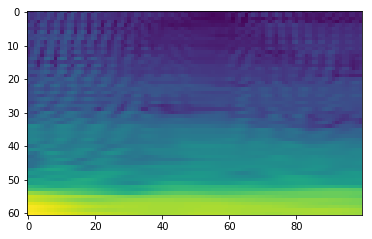

In [70]:
img.view(100,61).numpy()
plt.imshow(np.flipud(img.view(100,61).numpy().transpose()))

In [103]:
top_p, top_class = ps.topk(2, dim=1)
print(top_p)
print(top_class)
print

tensor([[0.5682, 0.4318]])
tensor([[1, 0]])


In [112]:
next(model.parameters()).is_cuda

False

In [47]:
images, labels = next(iter(trainloader))
with torch.no_grad():
    logps = model(images)
    
ps = torch.exp(logps)
print(ps)
print(labels)

RuntimeError: Expected object of device type cuda but got device type cpu for argument #2 'mat1' in call to _th_addmm

In [124]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]])


In [134]:
equals = top_class == labels.view(*top_class.shape)
print(equals)

tensor([[ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False]])


In [135]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 50.0%
